In [1]:
import pickle, math, cv2,os,sys
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from Package.simple_convnet import SimpleConvNet
from Package.trainer import Trainer
from PIL import Image

In [2]:
def show_img(img, label_array, label,star_num = 0, stop_num = 10):
    
    #__________ show gray images ____________

    plt.figure(figsize=[5,5],dpi=100)
    plt.suptitle("display 0-9 image pictures as gray mode")
    
    for i in range(star_num, stop_num):
        plt.subplot(math.ceil((stop_num - star_num)/5),5,i+1-star_num)
        plt.title(str(i)+" ->"+str(label[label_array[i]]))
        plt.xticks([])
        plt.yticks([])
        
        plt.imshow(array2img((img[i]*255).reshape(32,32)))
    
    plt.show()
    
def array2img(img):
    pil_img = Image.fromarray(np.uint8(img))
   # pil_img.show()
    return pil_img

## Incoud Dataset

In [3]:
# 輸入資料
with open ('Carplate_dataset_Noflatten35000.pkl','rb') as f:
    x=pickle.load(f)
    t=pickle.load(f)
    label=pickle.load(f)


#打亂資料
if isinstance(t,np.ndarray)==0 : t = np.array(t)
x = x.reshape(len(x),-1,32,32)
times = 150
for i in range(times):
    batch_mask = np.random.choice(len(x),len(x))
    x = x[batch_mask]
    t = t[batch_mask]

#資料切割
indices = [int(len(x) * n) for n in [0.7, 0.7 + 0.2]]  # 建立比例值矩陣  訓練:測試:驗證  0.7 0.2 0.1
x_train, x_test, x_val= np.split(x, indices)
t_train, t_test, t_val= np.split(t, indices)

__________show the original images__________


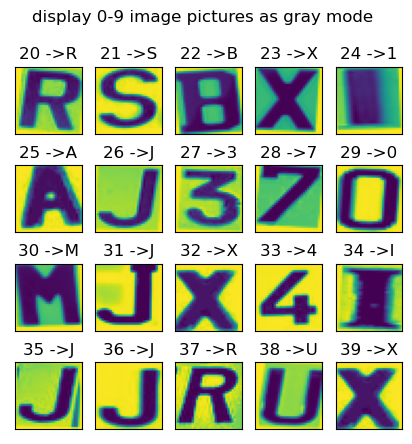

In [4]:
print("__________show the original images__________")
show_img(x_train, t_train, label, star_num = 20, stop_num = 40)   # num can enter Quantity 

## Network

In [5]:
#初始化網路和參數
network = SimpleConvNet(input_dim=(1,32,32), 
                        conv_param = {'filter_num': 40, 'filter_size': 3, 'pad': 0, 'stride': 1},
                        hidden_size=200, output_size=35, weight_init_std=0.01)

In [6]:
max_epochs = 5
''' 可以直接在這邊存初始值 和載入初始值 '''                 
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=500,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)

In [7]:
print(x_train.shape)
print(int(x_train.shape[0] / 350))

(25083, 1, 32, 32)
71


In [8]:
trainer.train()

train loss:3.5521751851068366
=== epoch:1, train acc:0.071, test acc:0.076 ===
train loss:3.5472779136921457
train loss:3.5354568618935227
train loss:3.522753278518052
train loss:3.505010350479969
train loss:3.4874562346063684
train loss:3.484193477149136
train loss:3.480973526087475
train loss:3.449676354122456
train loss:3.436541250295718
train loss:3.349985328232283
train loss:3.338326196560337
train loss:3.3034852053231614
train loss:3.220685232142607
train loss:3.197475305180544
train loss:3.1717153676904837
train loss:3.0493840666993455
train loss:2.957593151221366
train loss:2.9266714459920733
train loss:2.864657393265944
train loss:2.748771722830933
train loss:2.619468082402582
train loss:2.47683621952965
train loss:2.4160012270472024
train loss:2.292827573443397
train loss:2.1410372173576357
train loss:2.0647697858130463
train loss:2.006486459761581
train loss:1.804477641733597
train loss:1.6588258646340728
train loss:1.517178675761544
train loss:1.4353697653537811
train loss:

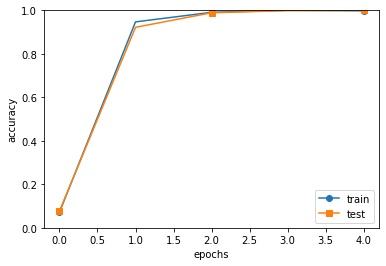

In [9]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 儲存模型

In [10]:
# パラメータの保存
network.save_params("Carplate_Converlution_weight_2.pkl")       # 存取 也可以直接存初始值
print("Saved Network Parameters!")

Saved Network Parameters!


##  Predict

In [11]:
# x ,t = get_data()
x=x_val
t=t_val
accuracy_cnt = 0



for i in range(len(x)):
    y= network.predict(x[i:i+1])
    p= np.argmax(y) # obtain index value of the highest prediction result 
    #print("The "+str(i)+"th image predict as : ", label[p] ," ."+" The actual value should be : "+ str(label[t[i]]))

    if label[p] == str(label[t[i]]):
        accuracy_cnt += 1
            
            
print(" Accuracy: " + str(float(accuracy_cnt)/len(x)))

 Accuracy: 1.0


In [12]:
# x ,t = get_data()
x=x_val
t=t_val
accuracy_cnt = 0



for i in range(len(x)):
    y= network.predict(x[i:i+1])
    p= np.argmax(y) # obtain index value of the highest prediction result 
    #print("The "+str(i)+"th image predict as : ", label[p] ," ."+" The actual value should be : "+ str(label[t[i]]))

    if label[p] == str(label[t[i]]):
        accuracy_cnt += 1
            
            
print(" Accuracy: " + str(float(accuracy_cnt)/len(x)))


 Accuracy: 1.0
